In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\supermarket_sales - Sheet1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Dari dataframe tersebut saya akan membuat 4 figure visualisasi data menggunakan streamlit, yaitu sebagai berikut:

1.   Product line yang disukai oleh Wanita
2.   Kota supermarket dengan tingkat kepuasan
3.   Metode pembayaran yang senang digunakan oleh customer dengan tingkat kepuasan >8
4.   Average COGS Per Day



Berdasarkan visualisasi yang akan dibuat, saya akan menghapus kolom yang tidak digunakan

In [7]:
ss = df.copy()
del ss["Invoice ID"]
del ss["Tax 5%"]
del ss["Branch"]
del ss["Total"]
del ss["gross margin percentage"]
del ss["gross income"]
ss

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,40.35,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,973.80,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,31.84,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,65.82,4.1


In [8]:
ss.groupby(['Product line','Gender']).sum()

Unit price  Quantity      cogs  Rating
Product line           Gender                                        
Electronic accessories Female     4372.33       488  25811.45   570.1
                       Male       4731.44       483  25938.58   607.1
Fashion accessories    Female     5330.59       530  28988.00   683.6
                       Male       4842.76       372  22731.90   567.6
Food and beverages     Female     5408.13       514  31591.35   648.3
                       Male       4337.41       438  21879.93   589.4
Health and beauty      Female     3269.71       343  17677.13   457.4
                       Male       5068.17       511  29174.05   607.1
Home and lifestyle     Female     4522.16       498  28606.55   534.3
                       Male       4328.55       413  22690.51   559.7
Sports and travel      Female     4784.32       496  27214.02   595.5
                       Male       4676.56       424  25283.91   552.6

In [9]:
ssw = ss.drop(ss.index[ss['Gender'] == 'Male'])
del ssw['Unit price']
del ssw['cogs']
del ssw['Rating']
ssw

,City,Customer type,Gender,Product line,Quantity,Date,Time,Payment
0,Yangon,Member,Female,Health and beauty,7,1/5/2019,13:08,Ewallet
1,Naypyitaw,Normal,Female,Electronic accessories,5,3/8/2019,10:29,Cash
6,Yangon,Member,Female,Electronic accessories,6,2/25/2019,14:36,Ewallet
7,Naypyitaw,Normal,Female,Home and lifestyle,10,2/24/2019,11:38,Ewallet
8,Yangon,Member,Female,Health and beauty,2,1/10/2019,17:15,Credit card
...,...,...,...,...,...,...,...,...
990,Yangon,Normal,Female,Food and beverages,5,3/22/2019,19:06,Credit card
991,Mandalay,Normal,Female,Sports and travel,10,1/24/2019,18:10,Ewallet
994,Naypyitaw,Member,Female,Electronic accessories,1,2/18/2019,11:40,Ewallet
996,Mandalay,Normal,Female,Home and lifestyle,10,3/2/2019,17:16,Ewallet


In [10]:
ssw.groupby(['Product line','Gender']).sum()

,,Quantity
Product line,Gender,
Electronic accessories,Female,488
Fashion accessories,Female,530
Food and beverages,Female,514
Health and beauty,Female,343
Home and lifestyle,Female,498
Sports and travel,Female,496


In [11]:
sshr = ss.drop(ss.index[ss['Rating'] < 8])
sshr

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,8.4
7,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2/24/2019,11:38,Ewallet,735.60,8.0
13,Yangon,Normal,Male,Food and beverages,43.19,10,2/7/2019,16:48,Ewallet,431.90,8.2
...,...,...,...,...,...,...,...,...,...,...,...
980,Naypyitaw,Member,Male,Food and beverages,59.59,4,1/19/2019,12:46,Cash,238.36,9.8
981,Yangon,Normal,Male,Health and beauty,58.15,4,1/23/2019,17:44,Cash,232.60,8.4
985,Mandalay,Normal,Female,Fashion accessories,63.71,5,2/7/2019,19:30,Ewallet,318.55,8.5
989,Mandalay,Member,Male,Health and beauty,75.37,8,1/28/2019,15:46,Credit card,602.96,8.4


In [12]:
sshr.groupby('Payment').count()

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,cogs,Rating
Payment,,,,,,,,,,
Cash,109,109,109,109,109,109,109,109,109,109
Credit card,112,112,112,112,112,112,112,112,112,112
Ewallet,108,108,108,108,108,108,108,108,108,108


In [13]:
ss['Date'].unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [14]:
ss['Z-Score'] = stats.zscore(ss['cogs'])
ss

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Z-Score
0,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1,0.919607
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6,-0.987730
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,7.4,0.071446
3,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,8.4,0.675780
4,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,604.17,5.3,1.267125
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,40.35,6.2,-1.141750
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,973.80,4.4,2.846340
997,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,31.84,7.7,-1.178109
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,65.82,4.1,-1.032932


In [15]:
ss.loc[ss['Z-Score'] > 3]

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Z-Score


In [16]:
ss.loc[ss['Z-Score'] < -3]

,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Z-Score


Karena tidak ditemukan Z-Score<-3 dan >3 maka dapat disimpulkan data COGS terdistribusi secara normal

In [17]:
ss['Date'] = pd.to_datetime(ss['Date'], errors='coerce')
daily_cogs = ss[['Date','cogs']].groupby('Date').sum()
print('Average COGS a day in 2019: {}'.format(np.round(daily_cogs['cogs'].mean())))

Average COGS a day in 2019: 3456.0


Saya asumsikan Average COGS Supermarket tahun lalu sebesar 3000 rata rata per hari, apakah hal tersebut menandakan COGS meningkat secara signifikan?
saya akan melakukan *single sample one sided test* dengan tingkat signifikansi 0.05

H0: μ <= 3000

H1: μ > 3000

In [18]:
t_stat,p_val = stats.ttest_1samp(daily_cogs.cogs, 3000)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.001993358289211853
t-statistics: 2.9570890635396894


c:\Users\LENOVO\anaconda3\envs\h8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


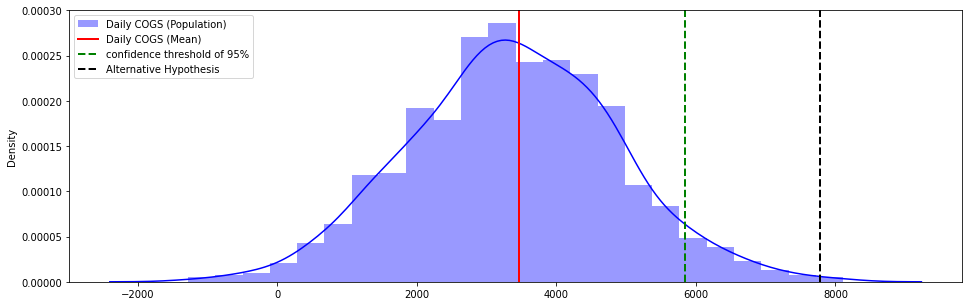

In [19]:
daily_cogs_pop = np.random.normal(daily_cogs.cogs.mean(), daily_cogs.cogs.std(), 1000)

ci = stats.norm.interval(0.90, daily_cogs.cogs.mean(), daily_cogs.cogs.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_cogs_pop, label='Daily COGS (Population)', color='blue')
plt.axvline(daily_cogs.cogs.mean(), color='red', linewidth=2, label='Daily COGS (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_cogs_pop.mean() + t_stat*daily_cogs_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena p-Value lebih kecil dari 0.05 maka kita tolak H0 sehingga dapat kita simpulkan adanya peningkatan signifikan Rata Rata COGS per hari dari tahun sebelumnya

In [21]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [23]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])